# Mapping tracer concentration on shelf bottom

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)

Ptracer12='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc'
PtracerOut12 = Dataset(Ptracer12)

Ptracer07='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'
PtracerOut07 = Dataset(Ptracer07)

Ptracer25='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/ptracersGlob.nc'
PtracerOut25 = Dataset(Ptracer25)


#PtracerNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'
#PtracerNoCOut = Dataset(PtracerNoC)


In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']



In [6]:
Tr03 = rout.getField(Ptracer,'Tr1') # 


In [7]:
Tr12 = rout.getField(Ptracer12,'Tr3') # 


In [8]:
Tr07 = rout.getField(Ptracer07,'Tr1') # 

In [9]:
Tr25 = rout.getField(Ptracer25,'Tr1') # 

In [31]:
def ConcArea(Tr, hfac, ra):
    '''Tr: tracer field (nt,nz,ny,nx)
       hfac: fraction of open cell at center (nz,ny,nx)
       ra: array of cell horizontal areas (ny,nx)
       RETURNS:
       ConcArea = concentration at cell closest to bottom times its area (nt,ny,nx)
       Conc = cocnetration near bottom (nt,ny,nx)'''
    
    ConcArea = np.empty((19,360,360))
    Conc = np.empty((19,360,360))
    Area = np.empty((360,360))
    BottomInd = np.argmax(hfac[::-1,:,:]>0.0,axis=0) # start looking for first no-land cell from the bottom up.
    BottomInd = np.ones(np.shape(BottomInd))*89 - BottomInd # Get index of unreversed z axis

    print(np.shape(BottomInd))
    for tt in range(19):
        print(tt)
        for i in range(360):
            for j in range(360):
                TrBottom = Tr[tt,BottomInd[i,j],i,j]
                ConcArea[tt,i,j] = TrBottom*ra[i,j]
                Conc[tt,i,j] = TrBottom
                Area[i,j] = ra[i,j]
    
    print(np.shape(ConcArea))

    #ConcAreaMasked = np.ma.masked_values(ConcDepths,-2.5)
    #ConcDepths[np.where(np.ma.getmask(ConcDepthsMasked)==True)] = np.nan
    return (ConcArea,Conc, Area)

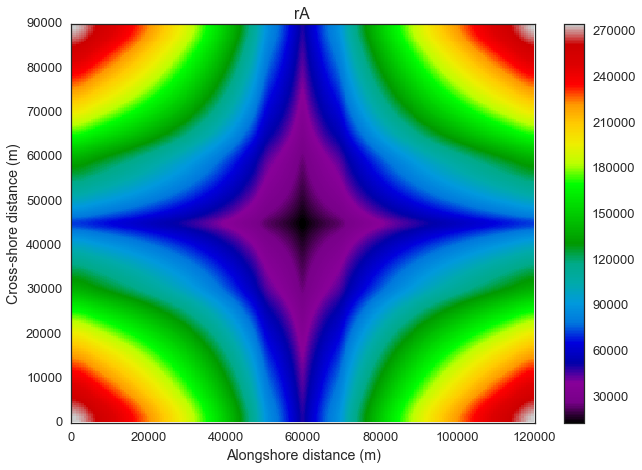

In [11]:
sns.set_context('talk',font_scale=1.0)
#TrBottom = Tr1[0,BottomInd[i,j],50,50]
#print(Tr1[0,BottomInd[i,j],i,j])
plt.pcolor(xc[1,:],yc[:,1],rA[:,:],cmap='spectral')
cbar = plt.colorbar()
plt.title('rA')
plt.ylabel('Cross-shore distance (m)')
plt.xlabel('Alongshore distance (m)')

In [32]:
ConcArea1,Conc1,Area1=ConcArea(Tr03, hFacCNoC, rANoC)

(360, 360)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


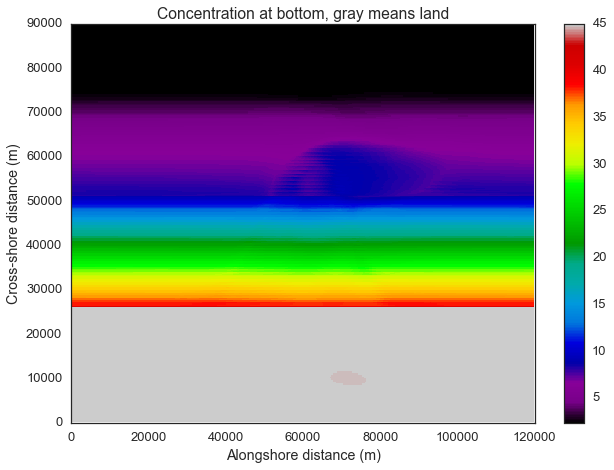

In [33]:
sns.set_context('talk',font_scale=1.0)
plt.pcolor(xc[1,:],yc[:,1],Conc1[10,:,:],cmap='spectral')
cbar = plt.colorbar()
plt.title('Concentration at bottom, gray means land')
plt.ylabel('Cross-shore distance (m)')
plt.xlabel('Alongshore distance (m)')

In [34]:
ConcArea3,Conc3,Area3=ConcArea(Tr12, hFacCNoC, rANoC)

(360, 360)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


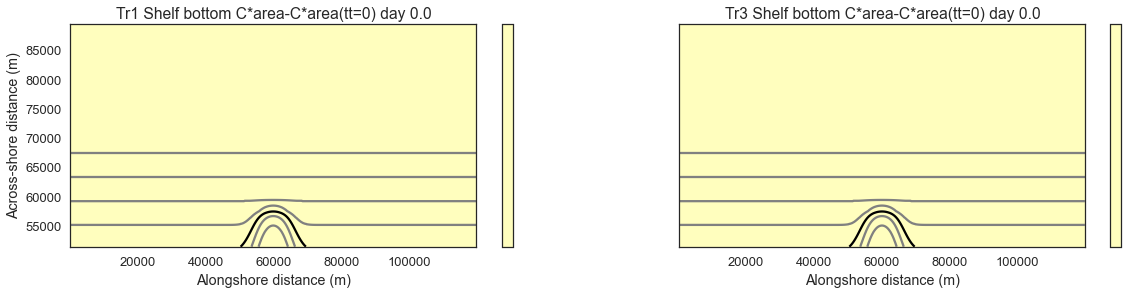

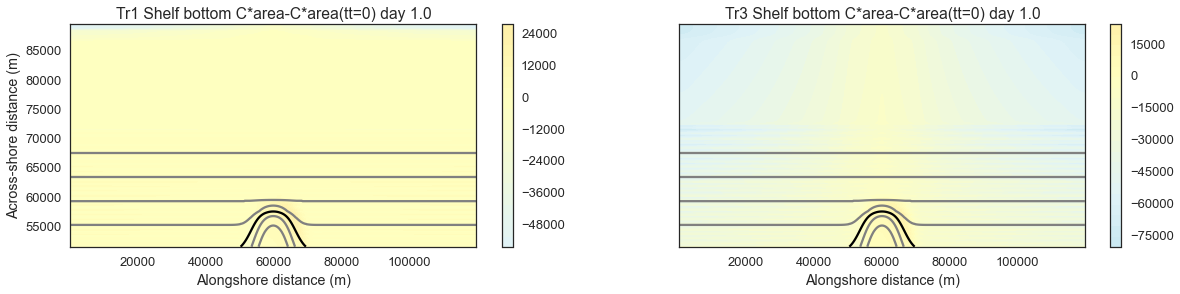

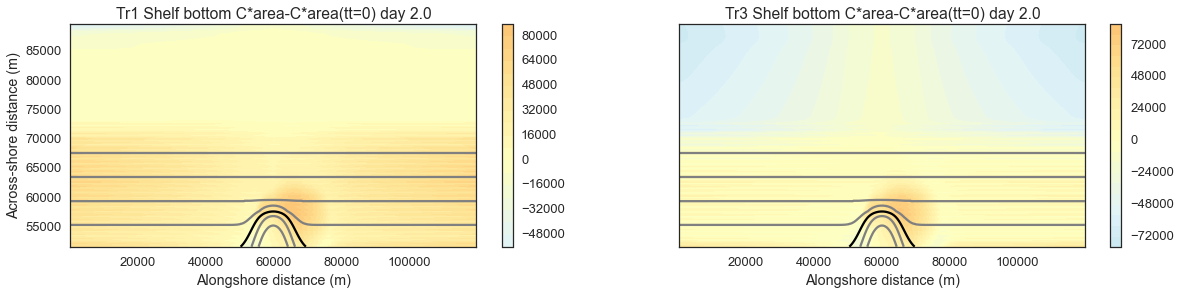

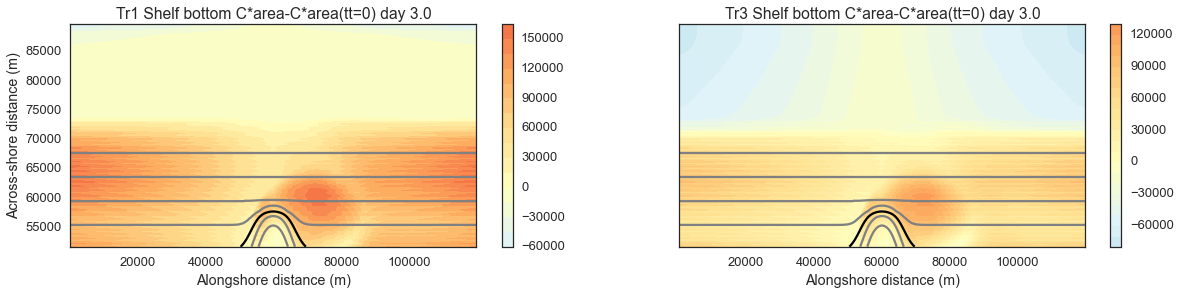

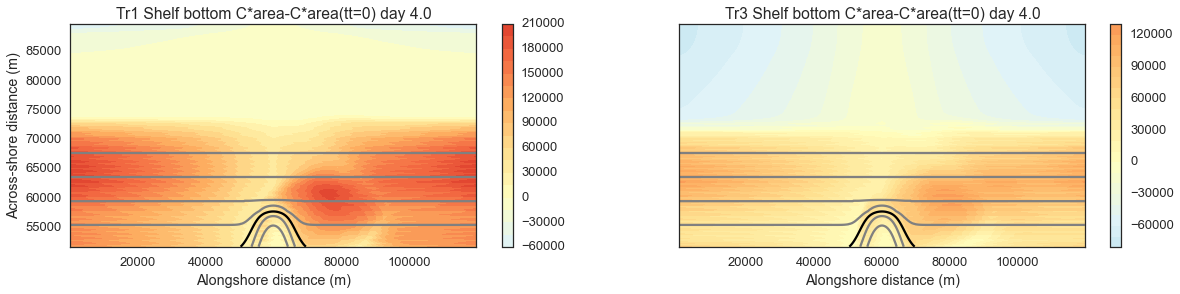

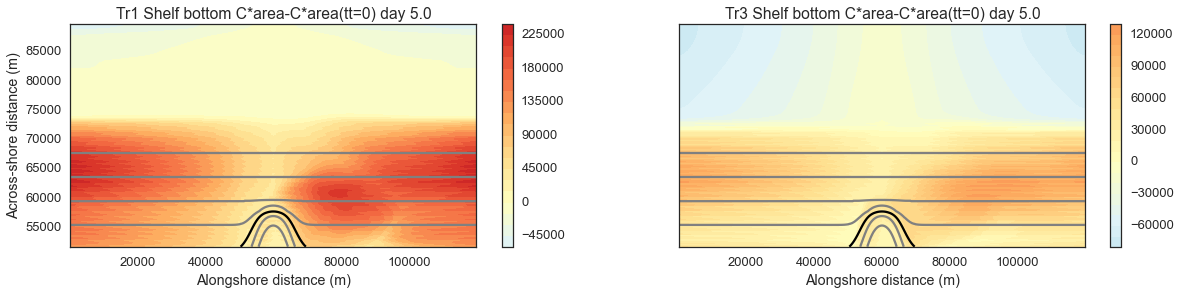

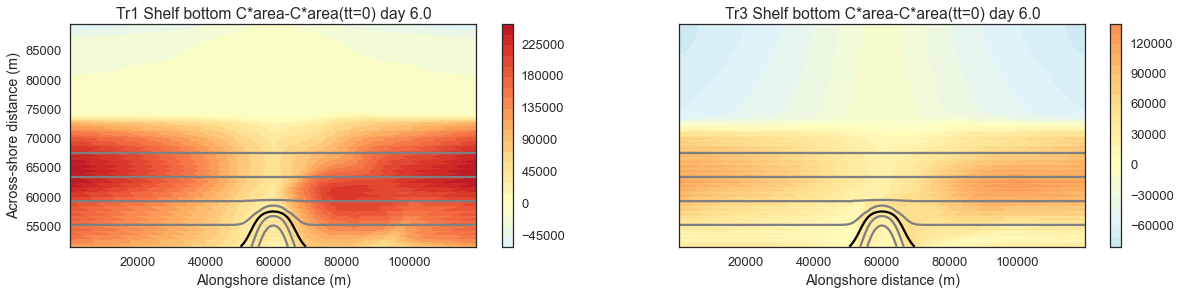

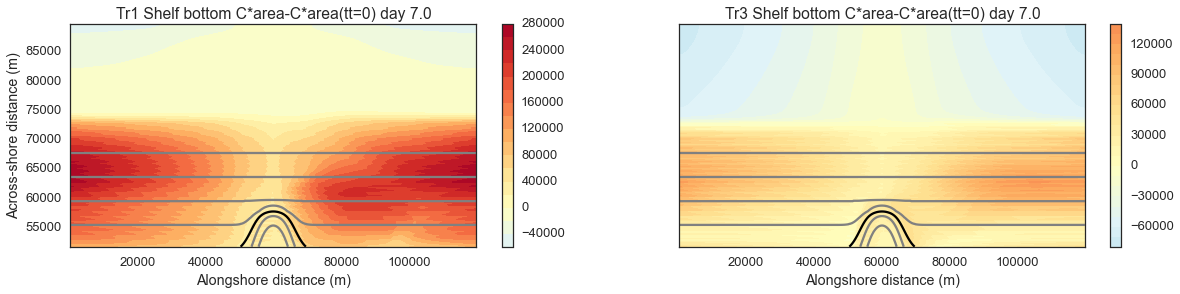

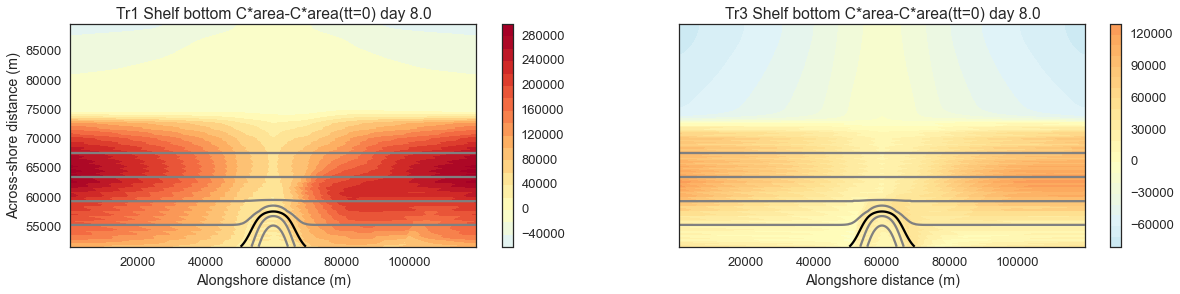

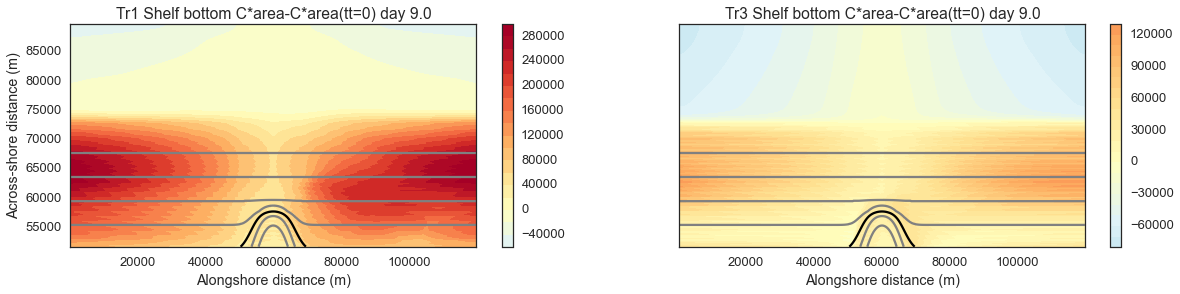

In [35]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    
    fig,((ax1),(ax2)) = plt.subplots(1, 2, figsize=(20, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:,:],yc[227:,:],ConcArea1[tt,227:,:]-ConcArea1[0,227:,:],20,vmin=-280000,vmax=280000,cmap='RdYlBu_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    #cb.set_label('')
    cset = ax1.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Tr1 Shelf bottom C*area-C*area(tt=0) day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    iso2 = ax2.contourf(xc[227:,:],yc[227:,:],ConcArea3[tt,227:,:]-ConcArea3[0,227:,:],20,vmin=-280000,vmax=280000,cmap='RdYlBu_r')
    cb2 = plt.colorbar(iso2, shrink=1,ax=ax2)
    #cb2.set_label('m')
    cset = ax2.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Tr3 Shelf bottom C*area-C*area(tt=0) day %0.1f ' %(tt/2.0))
    #ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    plt.tight_layout
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

Note that I used the flat shelf mask to find the "shelf bottom". This means that the region over the canyon is the concentration*area over the lid of the canyon.

In [36]:
ConcArea1noc,Conc1noc,Area1noc=ConcArea(Tr07, hFacCNoC, rANoC)

(360, 360)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [37]:
ConcArea3noc,Conc3noc,Area3noc=ConcArea(Tr25, hFacCNoC, rANoC)

(360, 360)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


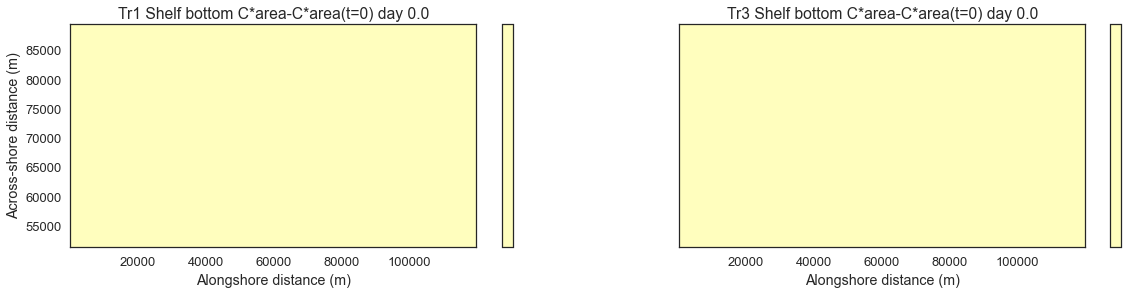

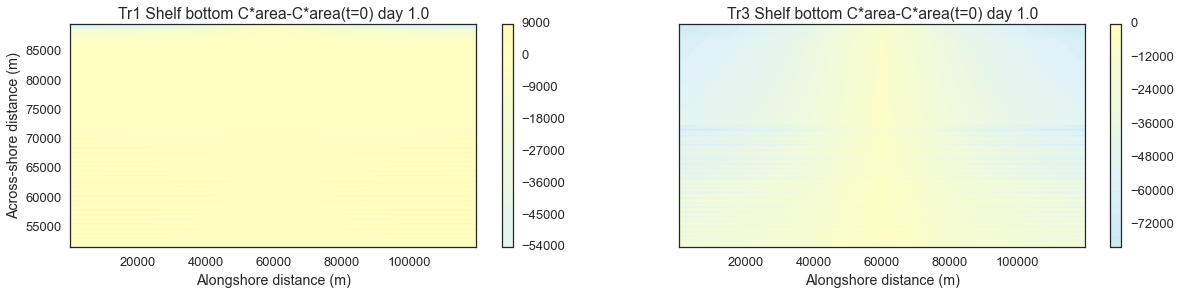

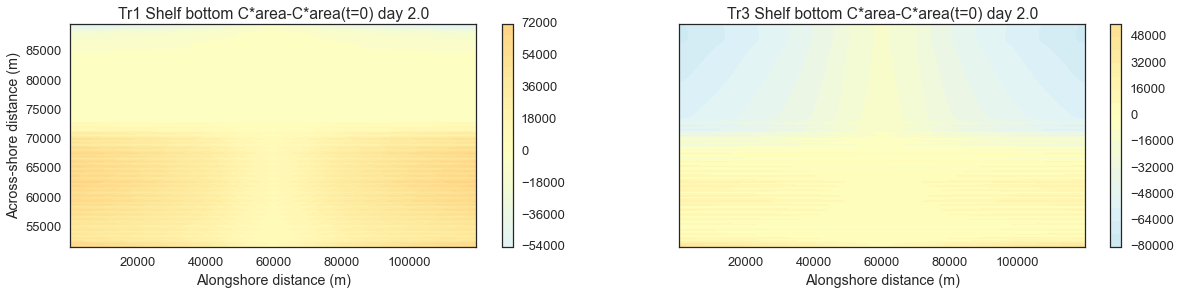

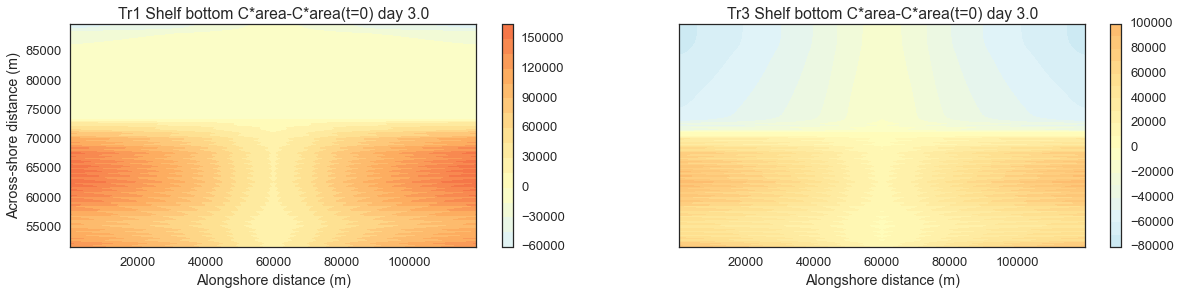

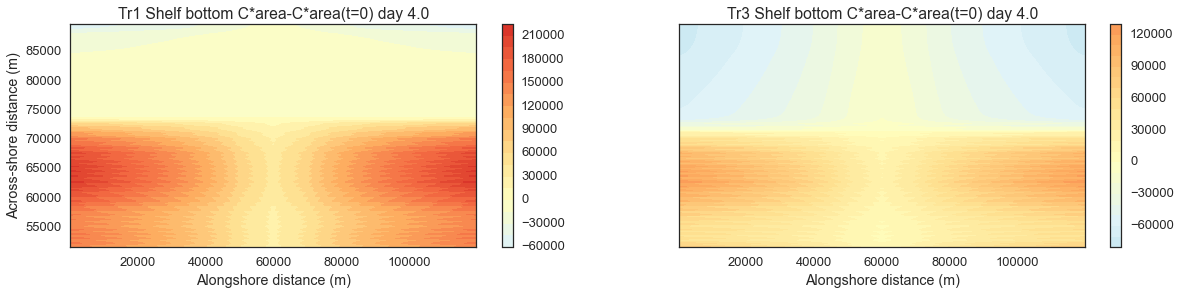

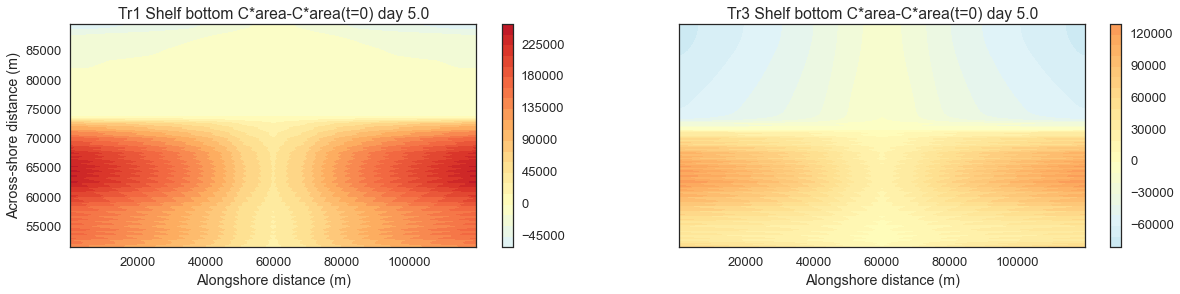

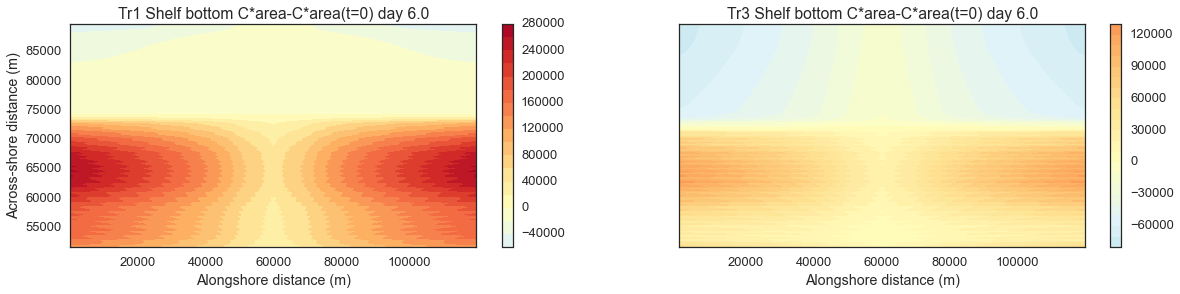

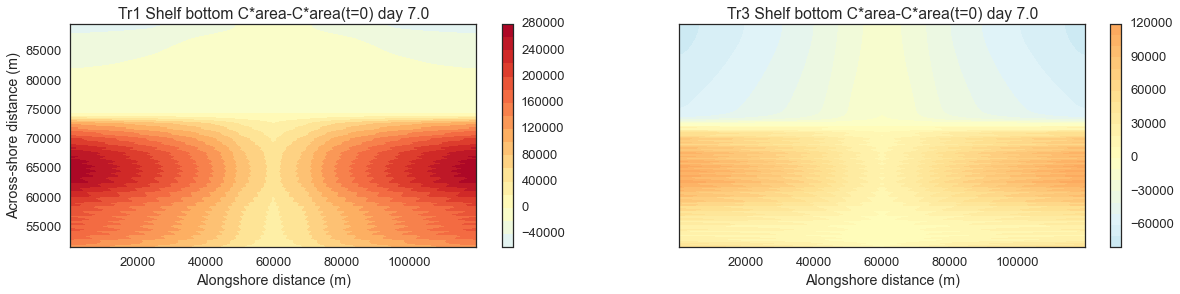

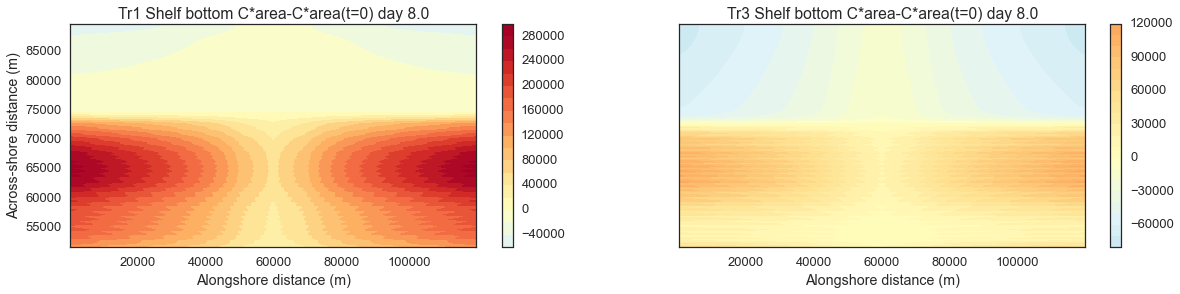

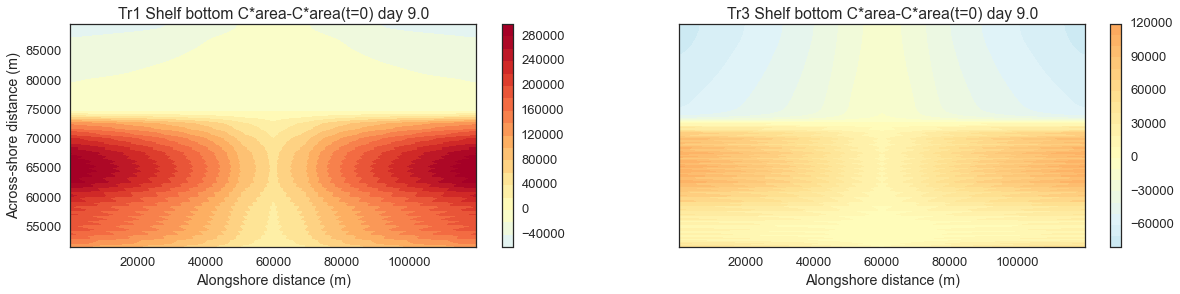

In [27]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    
    fig,((ax1),(ax2)) = plt.subplots(1, 2, figsize=(20, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:,:],yc[227:,:],ConcArea1noc[tt,227:,:]-ConcArea1[0,227:,:],20,vmin=-280000,vmax=280000,cmap='RdYlBu_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    #cb.set_label('')
    #cset = ax1.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Tr1 Shelf bottom C*area-C*area(t=0) day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    iso2 = ax2.contourf(xc[227:,:],yc[227:,:],ConcArea3noc[tt,227:,:]-ConcArea3[0,227:,:],20,vmin=-280000,vmax=280000,cmap='RdYlBu_r')
    cb2 = plt.colorbar(iso2, shrink=1,ax=ax2)
    #cb2.set_label('m')
    #cset = ax2.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Tr3 Shelf bottom C*area-C*area(t=0) day %0.1f ' %(tt/2.0))
    #ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    plt.tight_layout
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [45]:
def a_weight_mean(ConcArea,Area):
    
    sumNum = np.sum(np.sum(ConcArea,axis=1),axis=1)
    sumDen = np.sum(Area)
    
    awmean = sumNum/sumDen
    return awmean

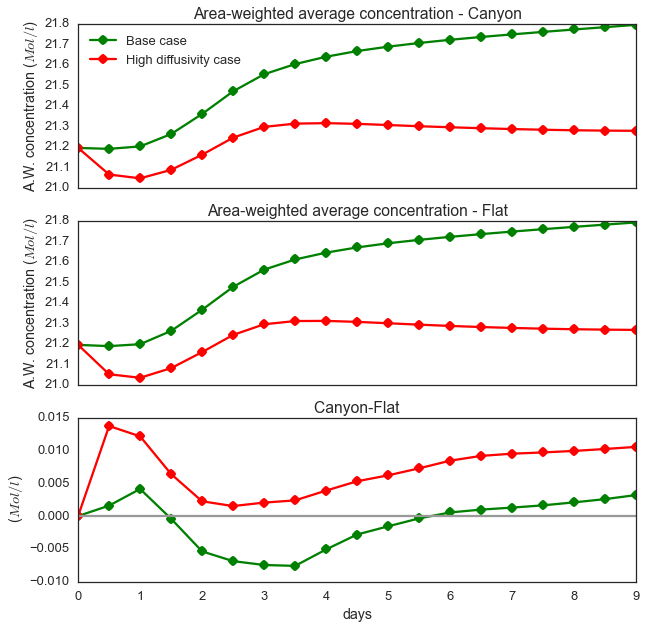

In [51]:
sns.set_context('talk', font_scale=1.0)
times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    
ax1.plot(times,a_weight_mean(ConcArea1,Area1),'go-',label='Base case')
ax1.plot(times,a_weight_mean(ConcArea3,Area3),'ro-',label='High diffusivity case')

ax1.set_aspect('auto')
ax1.set_title('Area-weighted average concentration - Canyon ' %(tt/2.0))
ax1.set_ylabel('A.W. concentration ($Mol/l$)')

ax2.plot(times,a_weight_mean(ConcArea1noc,Area1noc),'go-',label='Base case')
ax2.plot(times,a_weight_mean(ConcArea3noc,Area3noc),'ro-',label='High diffusivity case')

ax2.set_aspect('auto')
ax2.set_title('Area-weighted average concentration - Flat ' %(tt/2.0))
ax2.set_ylabel('A.W. concentration ($Mol/l$)')

ax3.plot(times,a_weight_mean(ConcArea1,Area1)-a_weight_mean(ConcArea1noc,Area1noc),'go-',label='Base case')
ax3.plot(times,a_weight_mean(ConcArea3,Area3)-a_weight_mean(ConcArea3noc,Area3noc),'ro-',label='High diffusivity case')
ax3.axhline(y=0, color='0.6')
ax3.set_aspect('auto')
ax3.set_title('Canyon-Flat ' %(tt/2.0))
ax3.set_ylabel(' ($Mol/l$)')
ax3.set_xlabel('days')

ax1.legend(loc=0)    
plt.tight_layout
plt.show()

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

(19,)
